# Mathematical Underpinnings - Lab 4

In [1]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, pearsonr
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
import pandas as pd

## Task 1

### a)

#### bp 1)

In [2]:
# a heatmap
# you may use pcolormesh function and draw a heatmap for a sample
# or draw a heatmap for a teoretic density function

# I give you an answer to that task, because it may take too much time to do it during labs. 

In [3]:
def plot_xyz(data_2d, nbins=300):
    x = data_2d[:,0]
    y = data_2d[:,1]
    k = gaussian_kde([x, y])
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    return xi, yi, zi

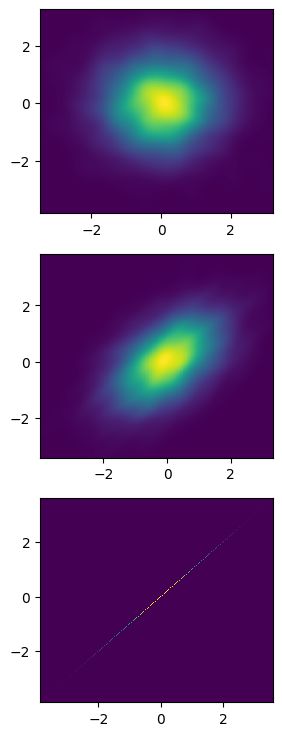

In [4]:
fig, axs = plt.subplots(3, figsize=(3,9))

n = 5000

data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0], [0, 1]]), n)
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.5], [0.5, 1]]), n)
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 1], [1, 1]]), n)
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2)

In [5]:
# pearsonr - Pearson correlation
# use sklearn.metrics.mutual_info_score although it is not the best option 
#       (as it takes max over permutations of classes of r.v. instead of computing one value and returning it)

# mutual_info_classif <- that's what I'll use

In [6]:
def compute_pearson_correlation_and_mutual_information(rho, n=1000, num_bins=10, print_results=True, seed=123):
    np.random.seed(seed)
    data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, rho], [rho, 1]]), n)
    x = data_2d[:,0]
    y = data_2d[:,1]
    pearson = pearsonr(x, y)[0]
    # Discretize the array
    x_bin_edges = np.linspace(x.min(), x.max(), num_bins + 1)
    x_discretized = np.digitize(x, x_bin_edges)
    y_bin_edges = np.linspace(y.min(), y.max(), num_bins + 1)
    y_discretized = np.digitize(y, y_bin_edges)
    mutual_info = mutual_info_classif(x_discretized.reshape(-1, 1), y_discretized)[0]
    if print_results:
        print(f"Results for rho = {rho}:")
        print(f"Pearson correlation: {pearson:.2f}")
        print(f"Mutual information: {mutual_info:.2f}")
    return pearson, mutual_info


compute_pearson_correlation_and_mutual_information(0.0);print()
compute_pearson_correlation_and_mutual_information(0.5);print()
compute_pearson_correlation_and_mutual_information(0.99);print()


Results for rho = 0.0:
Pearson correlation: 0.01
Mutual information: 0.00

Results for rho = 0.5:
Pearson correlation: 0.52
Mutual information: 0.17

Results for rho = 0.99:
Pearson correlation: 0.99
Mutual information: 1.31



#### bp 3)

In [7]:
rho_list = [i/10 for i in range(0, 10)] + [0.99]
pearson_correlation = {rho: [] for rho in rho_list}
mutual_information = {rho: [] for rho in rho_list}
repetitions = 100

results = pd.DataFrame()

for rho in rho_list:
    for _ in range(repetitions):
        pearson, mutual_info = compute_pearson_correlation_and_mutual_information(rho, print_results=False, seed=abs(int((rho+1)*100*(_+45))))
        
        results = pd.concat([
            results, 
            pd.DataFrame({
                'rho': rho,
                'pearson': pearson, 
                'mutual_info': mutual_info
            }, index=[0])
        ])

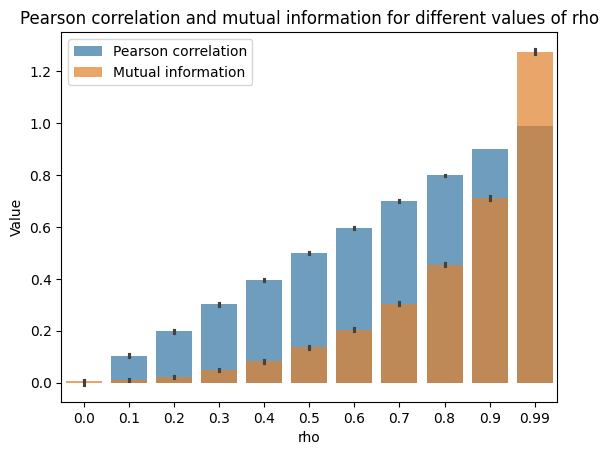

In [8]:
sns.barplot(x='rho', y='pearson', data=results, label='Pearson correlation', alpha=0.7)
sns.barplot(x='rho', y='mutual_info', data=results, label='Mutual information', alpha=0.7)
plt.xlabel('rho')
plt.ylabel('Value')
plt.legend()
plt.title('Pearson correlation and mutual information for different values of rho')
plt.show()

#### bp 4)

A hint: note that mutual information between two correlated normal distributions i.e. when $(X, Y)\sim \mathcal{N}((0,0)', \Sigma)$ and
$$\Sigma = \begin{pmatrix}
        \sigma_x^2 & \rho \\ \rho & \sigma_y^2
    \end{pmatrix}$$
equals
$$I(X,Y) = \frac{1}{2}\log \left(\frac{\sigma_x^2\sigma_y^2}{\sigma_x^2\sigma_y^2 - \rho^2}\right).$$

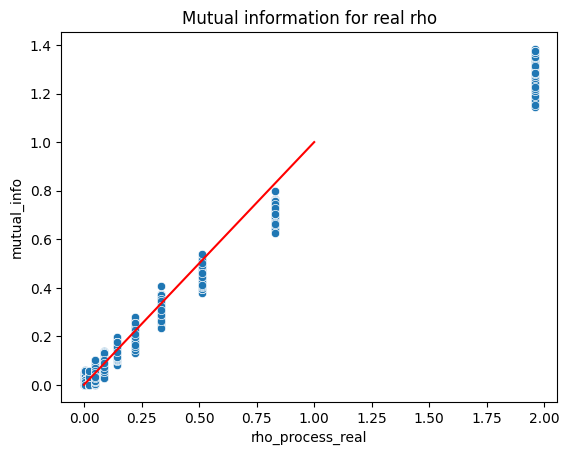

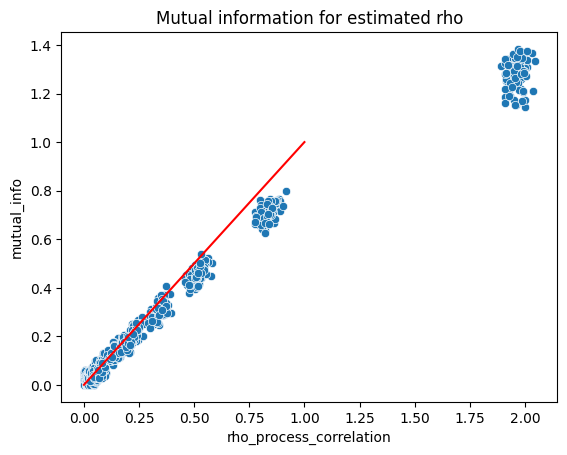

In [9]:
results['rho_process_real'] = -np.log(1 - results['rho']**2) / 2
results['rho_process_correlation'] = -np.log(1 - results['pearson']**2) / 2

x = np.linspace(0, 1, 100)

sns.scatterplot(x='rho_process_real', y='mutual_info', data=results)
plt.plot(x, x, color='red')
plt.title('Mutual information for real rho')
plt.show()

sns.scatterplot(x='rho_process_correlation', y='mutual_info', data=results)
plt.plot(x, x, color='red')
plt.title('Mutual information for estimated rho')
plt.show()

### b)

#### bp 1)

In [10]:
# again: this is too time consuming so here is an answer

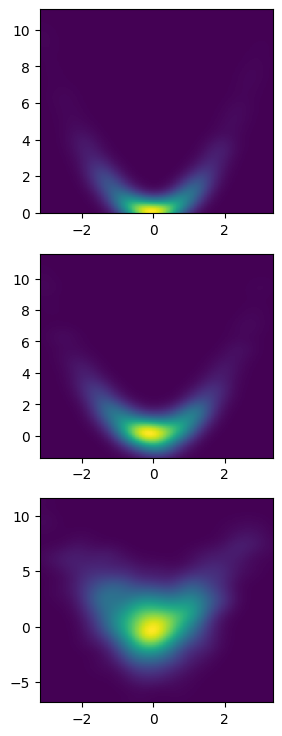

In [11]:
fig, axs = plt.subplots(3, figsize=(3,9))

n = 1000
x = np.random.normal(0, 1, n)

data_2d = np.array([x, x**2 + np.random.normal(0, 0, n)]).T
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 0.5, n)]).T
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 2, n)]).T
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2) and 3)

In [12]:
def compute_correlation_and_mutual_information(rho, n=1000, seed=123, print_results=True, num_bins=10):
    
    x = np.random.normal(0, 1, n)
    y = x**2 + np.random.normal(0, rho, n)

    pearson = pearsonr(x, y)[0]
    # Discretize the array
    x_bin_edges = np.linspace(x.min(), x.max(), num_bins + 1)
    x_discretized = np.digitize(x, x_bin_edges)
    y_bin_edges = np.linspace(y.min(), y.max(), num_bins + 1)
    y_discretized = np.digitize(y, y_bin_edges)
    mutual_info = mutual_info_classif(x_discretized.reshape(-1, 1), y_discretized)[0]
    if print_results:
        print(f"Results for rho = {rho}:")
        print(f"Pearson correlation: {pearson:.2f}")
        print(f"Mutual information: {mutual_info:.2f}")
    return pearson, mutual_info

compute_correlation_and_mutual_information(0.0);print()
compute_correlation_and_mutual_information(0.5);print()
compute_correlation_and_mutual_information(2);print()

Results for rho = 0.0:
Pearson correlation: 0.06
Mutual information: 0.46

Results for rho = 0.5:
Pearson correlation: -0.06
Mutual information: 0.53

Results for rho = 2:
Pearson correlation: -0.01
Mutual information: 0.19



In [13]:
rho_list = [i/10*2.5 for i in range(0, 9)]
pearson_correlation = {rho: [] for rho in rho_list}
mutual_information = {rho: [] for rho in rho_list}
repetitions = 100

results = pd.DataFrame()

for rho in rho_list:
    for _ in range(repetitions):
        pearson, mutual_info = compute_correlation_and_mutual_information(rho, print_results=False, seed=abs(int((rho+1)*100*(_+45))))
        
        results = pd.concat([
            results, 
            pd.DataFrame({
                'rho': rho,
                'pearson': pearson, 
                'mutual_info': mutual_info
            }, index=[0])
        ])

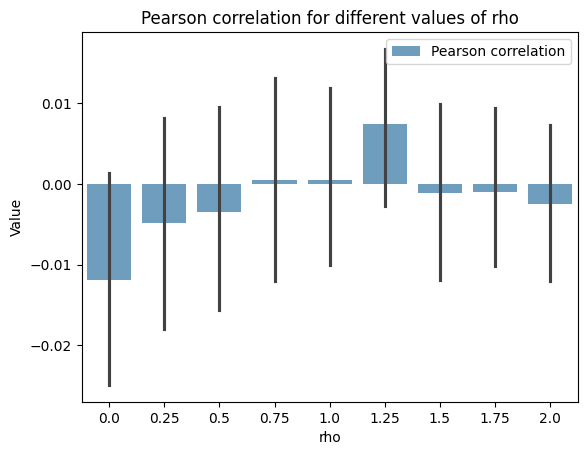

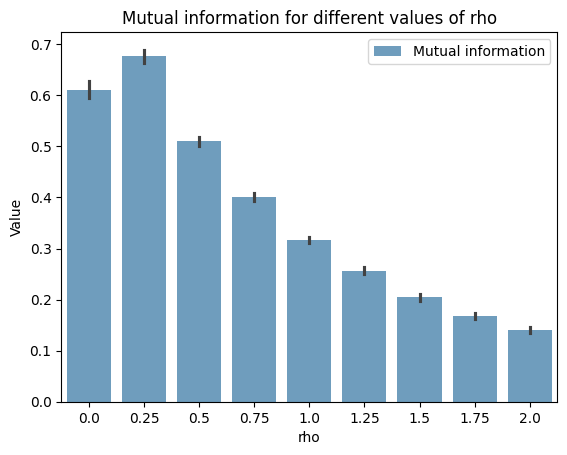

In [14]:
sns.barplot(x='rho', y='pearson', data=results, label='Pearson correlation', alpha=0.7)
plt.xlabel('rho')
plt.ylabel('Value')
plt.legend()
plt.title('Pearson correlation for different values of rho')
plt.show()

sns.barplot(x='rho', y='mutual_info', data=results, label='Mutual information', alpha=0.7)
plt.xlabel('rho')
plt.ylabel('Value')
plt.legend()
plt.title('Mutual information for different values of rho')
plt.show()

## Task 2

### a)

In [15]:
def asymptotic_independence_test(x, y, stats = "mi"): # or "chi2"
    assert stats in ["mi", "chi2"], "stats should be either 'mi' or 'chi2'"
    n_bins = 10
    degree_of_freedom = (n_bins - 1) ** 2
    # Discretize the array
    x_bin_edges = np.linspace(x.min(), x.max(), n_bins + 1)
    x_discretized = np.digitize(x, x_bin_edges)
    y_bin_edges = np.linspace(y.min(), y.max(), n_bins + 1)
    y_discretized = np.digitize(y, y_bin_edges)

    stat = 2 * len(x) * mutual_info_classif(x_discretized.reshape(-1, 1), y_discretized)[0] if stats == "mi" else\
           chi2_contingency(np.histogram2d(x_discretized, y_discretized, bins=n_bins)[0])[0] if stats == "chi2" else\
           None
    return stat, chi2.sf(stat, degree_of_freedom)

### b)

In [16]:
def perform_independence_test_based_on_permutations(x, y, b_number_of_permutations=100):
    n_bins = 10
    # Discretize the array
    x_bin_edges = np.linspace(x.min(), x.max(), n_bins + 1)
    x_discretized = np.digitize(x, x_bin_edges)
    y_bin_edges = np.linspace(y.min(), y.max(), n_bins + 1)
    y_discretized = np.digitize(y, y_bin_edges)

    mutual_info = mutual_info_classif(x_discretized.reshape(-1, 1), y_discretized)[0]
    results_from_permutations = []
    for _ in range(b_number_of_permutations):
        x_discretized_permuted = np.random.permutation(x_discretized)
        results_from_permutations.append(mutual_info_classif(x_discretized_permuted.reshape(-1, 1), y_discretized)[0])

    return 2 * len(x) * mutual_info, (1 + np.sum(np.array(results_from_permutations) >= mutual_info)) / (1 + b_number_of_permutations)

### c)

**Independent r.v.**

A hint: two discretized independent normal random variables (or any two independent discrete r.v.)

In [17]:
# independent r.v. - we expect that our tests don't reject the null hypothesis

In [18]:
n = 1000; x, y = np.random.normal(0, 1, n), np.random.normal(0, 1, n) # same but independent

In [19]:
print(f"asymptotic_independence_test for mutual information: {asymptotic_independence_test(x, y, stats='mi')}")
print(f"asymptotic_independence_test for chi2: {asymptotic_independence_test(x, y, stats='chi2')}")
print(f"perform_independence_test_based_on_permutations: {perform_independence_test_based_on_permutations(x, y)}")

asymptotic_independence_test for mutual information: (0, 1.0)
asymptotic_independence_test for chi2: (74.80067901174608, 0.6726802186817579)


perform_independence_test_based_on_permutations: (0, 1.0)


### p values above 0.05 => H0 null hypothesis is not rejected

**Dependent r.v.**

A hint: two discretized dependent normal random variables (or two categorical wuch that we enforce $X=Y$ for a subset of observations)

In [20]:
# independent r.v. - ideally we will reject the null hypothesis

In [21]:
n = 1000; data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.5], [0.5, 1]]), n)
x, y = data_2d[:,0], data_2d[:,1]

In [22]:
print(f"asymptotic_independence_test for mutual information: {asymptotic_independence_test(x, y, stats='mi')}")
print(f"asymptotic_independence_test for chi2: {asymptotic_independence_test(x, y, stats='chi2')}")
print(f"perform_independence_test_based_on_permutations: {perform_independence_test_based_on_permutations(x, y)}")

asymptotic_independence_test for mutual information: (316.87960709579244, 1.2566130146487161e-29)
asymptotic_independence_test for chi2: (458.18765755677697, 4.9980832091585535e-54)
perform_independence_test_based_on_permutations: (317.90671946864535, 0.009900990099009901)


### p values below 0.05 << H0 null hypothesis is rejected